In [2]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [3]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])
dframe1

,One,Two,Three
A,1,2,NaN
B,NaN,3,4


In [5]:
# 合計を求めるsumの動きを確認しましょう。
#行方向に計算が進むので、列の合計が見られます。
dframe1.sum()

One      1
Two      5
Three    4
dtype: float64

In [6]:
#行の合計を求めたいときは、列方向（axis=1）で計算
dframe1.sum(axis=1)

A    3
B    7
dtype: float64

In [8]:
# 最小値を求める。
dframe1.min()

One      1
Two      2
Three    4
dtype: float64

In [9]:
# 最小値を保持しているindexを調べられます。
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [11]:
# maxでも同じことができます。

In [12]:
dframe1

,One,Two,Three
A,1,2,NaN
B,NaN,3,4


In [13]:
# 累積を求めることができます。
dframe1.cumsum()

,One,Two,Three
A,1,2,NaN
B,NaN,5,4


In [14]:
# DataFrameの全体像を簡単に見ることができます。
dframe1.describe()

,One,Two,Three
count,1,2.000000,1
mean,1,2.500000,4
std,NaN,0.707107,NaN
min,1,2.000000,4
25%,1,2.250000,4
50%,1,2.500000,4
75%,1,2.750000,4
max,1,3.000000,4


In [15]:
# 共分散（covariance）と相関（correlation）
# 英語ですが、次の動画が参考になります。

In [35]:
from IPython.display import YouTubeVideo
# 共分散の説明（英語）
YouTubeVideo('xGbpuFNR1ME')

In [36]:
# 相関の説明（英語）
YouTubeVideo('4EXNedimDMs')

In [16]:
# 株価のデータを使って、共分散と相関をみていきましょう。
# PandasはWebからデータをとってくることも可能です。
import pandas.io.data as pdweb
# 日付を扱うために、datetimeをimportします。
import datetime
# 米国のYahooのサービスを使って、株価を取得します。
# すべて石油関連会社
# CVX シェブロン、XOM エクソンモービル、BP 英BP
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,46.315434,64.697761,59.215446
2010-01-05,46.644300,65.156034,59.446653
2010-01-06,46.887036,65.164213,59.960452
2010-01-07,46.871375,64.918715,59.772064
2010-01-08,46.980997,65.033282,59.532285


In [17]:
# 出来高（何株売買されたか）のデータも取れます
volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100,10173800,27809100
2010-01-05,4109600,10593700,30174700
2010-01-06,6227900,11014600,35044700
2010-01-07,4431300,9626900,27192100
2010-01-08,3786100,5624300,24891800


In [18]:
# 変化の割合を計算できます。
rets = prices.pct_change()

In [20]:
rets.head()

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007101,0.007083,0.003905
2010-01-06,0.005204,0.000126,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142
2010-01-08,0.002339,0.001765,-0.004012


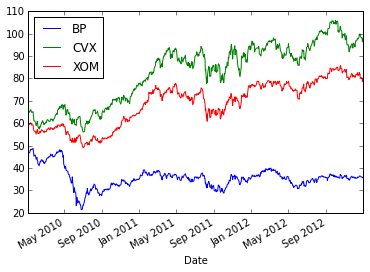

In [24]:
# まず、単純な株価の変化を描画してみます。
%matplotlib inline
prices.plot()

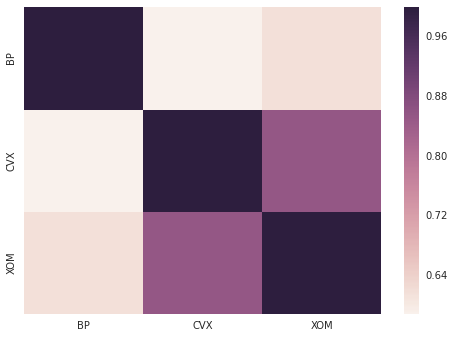

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# 予想通りの相関が見られます。
sns.heatmap(rets.corr())
# seabornについては、後ほど詳しく学習します。

In [32]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [33]:
#  重複するデータをまとめられます。
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [34]:
# それぞれのデータがいくつあるかもわかります。
ser1.value_counts()

w    4
x    3
z    2
y    2
a    1
dtype: int64